# Churn Prediction
Customers of a big international bank, who decided to leave (Exited) from the bank.

The story: A bank is investigating a very high rate of customer leaving the bank. Here is a 10.000 records dataset to investigate and predict which of the customers are more likely to leave the bank soon.

Dataset Kaggle link : https://www.kaggle.com/filippoo/deep-learning-az-ann

In [1]:
import pandas as pd

# read data
dataset = pd.read_csv("Churn_Modelling.csv", header=0)
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [3]:
# Unique geographic values in visual_ds
if dataset["Gender"][0] in ("Male", "Female"):
    unique_geography = dataset[["Geography"]].groupby("Geography").size()
print(unique_geography)

Geography
France     5014
Germany    2509
Spain      2477
dtype: int64


Transformation of some values in dataset.

In [4]:
# we are going to modify the copy of dataset for visualation
visual_ds = dataset.copy()

# transform gender values geographic values
if visual_ds["Gender"][0] in ("Male", "Female"):
    for row in [visual_ds]:
        row["Gender"] = row["Gender"].map( {"Male": 0, "Female": 1} ).astype(int)
        row["Geography"] = row["Geography"].map( {"France": 0, "Germany": 1, "Spain": 2} ).astype(int)
    # end of for loop
# end of if clause

# transform age values
if visual_ds["Age"][0] > 17:
    visual_ds.loc[ visual_ds["Age"] <= 16, "AgeRange"] = 0
    visual_ds.loc[(visual_ds["Age"] > 16) & (visual_ds["Age"] <= 32), "AgeRange"] = 1
    visual_ds.loc[(visual_ds["Age"] > 32) & (visual_ds["Age"] <= 48), "AgeRange"] = 2
    visual_ds.loc[(visual_ds["Age"] > 48) & (visual_ds["Age"] <= 64), "AgeRange"] = 3
    visual_ds.loc[ visual_ds["Age"] > 64, "AgeRange"] = 4
# end of if clause

# transform CreditScore values
if visual_ds["CreditScore"][0] > 4:
    visual_ds.loc[ visual_ds["CreditScore"] <= 450, "CreditScoreRange"] = 0
    visual_ds.loc[(visual_ds["CreditScore"] > 450) & (visual_ds["CreditScore"] <= 550), "CreditScoreRange"] = 1
    visual_ds.loc[(visual_ds["CreditScore"] > 550) & (visual_ds["CreditScore"] <= 650), "CreditScoreRange"] = 2
    visual_ds.loc[(visual_ds["CreditScore"] > 650) & (visual_ds["CreditScore"] <= 750), "CreditScoreRange"] = 3
    visual_ds.loc[ visual_ds["CreditScore"] > 750, "CreditScoreRange"] = 4
# end of if clause

# transform CreditScore values
if visual_ds["Balance"][1] > 4:
    visual_ds.loc[ visual_ds["Balance"] <= 50000, "BalanceRange"] = 0
    visual_ds.loc[(visual_ds["Balance"] > 50000) & (visual_ds["Balance"] <= 100000), "BalanceRange"] = 1
    visual_ds.loc[(visual_ds["Balance"] > 100000) & (visual_ds["Balance"] <= 150000), "BalanceRange"] = 2
    visual_ds.loc[(visual_ds["Balance"] > 150000) & (visual_ds["Balance"] <= 200000), "BalanceRange"] = 3
    visual_ds.loc[ visual_ds["Balance"] > 200000, "BalanceRange"] = 4
# end of if clause

# transform EstimatedSalary values
if visual_ds["EstimatedSalary"][0] > 4:
    visual_ds.loc[ visual_ds["EstimatedSalary"] <= 40000, "EstimatedSalaryRange"] = 0
    visual_ds.loc[(visual_ds["EstimatedSalary"] > 40000) & (visual_ds["EstimatedSalary"] <= 80000), \
                "EstimatedSalaryRange"] = 1
    visual_ds.loc[(visual_ds["EstimatedSalary"] > 80000) & (visual_ds["EstimatedSalary"] <= 120000), \
                "EstimatedSalaryRange"] = 2
    visual_ds.loc[(visual_ds["EstimatedSalary"] > 120000) & (visual_ds["EstimatedSalary"] <= 160000), \
                "EstimatedSalaryRange"] = 3
    visual_ds.loc[ visual_ds["EstimatedSalary"] > 160000, "EstimatedSalaryRange"] = 4
# end of if clause


if "RowNumber" in visual_ds.columns:
    visual_ds = visual_ds.drop(["RowNumber"], axis=1)
if "CustomerId" in visual_ds.columns:
    visual_ds = visual_ds.drop(["CustomerId"], axis=1)
if "Surname" in visual_ds.columns:
    visual_ds = visual_ds.drop(["Surname"], axis=1)

visual_ds.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeRange,CreditScoreRange,BalanceRange,EstimatedSalaryRange
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,650.528800,0.746300,0.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,1.903400,2.485100,1.211000,2.00340
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.713105,0.984518,1.054699,1.40783
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,1.000000,0.000000,0.000000,0.00000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,1.000000,2.000000,0.000000,1.00000
50%,652.000000,0.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,2.000000,3.000000,1.000000,2.00000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,2.000000,3.000000,2.000000,3.00000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,4.000000,4.000000,4.000000,4.00000


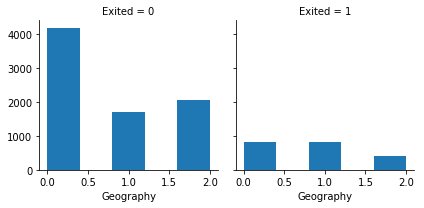

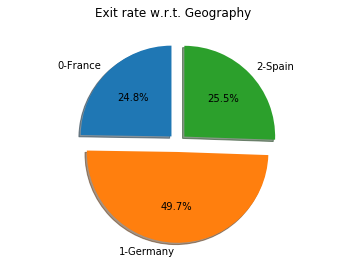

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.FacetGrid(visual_ds, col='Exited')
g.map(plt.hist, 'Geography', bins=5)

means = visual_ds[['Geography', 'Exited']].groupby(["Geography"], as_index=False).mean()

labels = '0-France', '1-Germany', '2-Spain'
total = means["Exited"].sum()
sizes = [means["Exited"][0] / total, means["Exited"][1] / total, means["Exited"][2] / total]

explode = (0.1, 0.1, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle("Exit rate w.r.t. Geography")

plt.show()

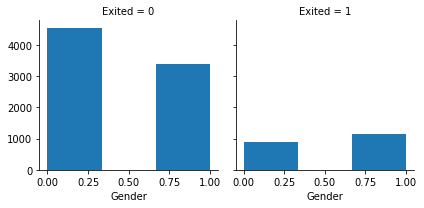

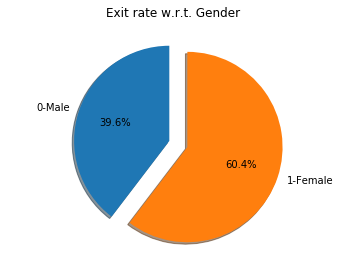

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.FacetGrid(visual_ds, col = 'Exited')
g.map(plt.hist, 'Gender', bins = 3)

means = visual_ds[['Gender', 'Exited']].groupby(["Gender"], as_index = False).mean()

labels = '0-Male', '1-Female'
total = means["Exited"].sum()
sizes = [means["Exited"][0] / total, means["Exited"][1] / total]

explode = (0.1, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle("Exit rate w.r.t. Gender")

plt.show()

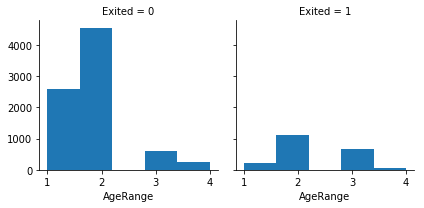

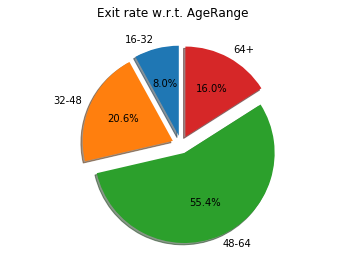

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.FacetGrid(visual_ds, col = "Exited")
g.map(plt.hist, "AgeRange", bins = 5)

means = visual_ds[["AgeRange", "Exited"]].groupby(["AgeRange"], as_index = False).mean()

labels = "16-32", "32-48", "48-64", "64+"
total = means["Exited"].sum()
sizes = [means["Exited"][0] / total, means["Exited"][1] / total \
        , means["Exited"][2] / total, means["Exited"][3] / total]

explode = (0.1, 0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle("Exit rate w.r.t. AgeRange")

plt.show()

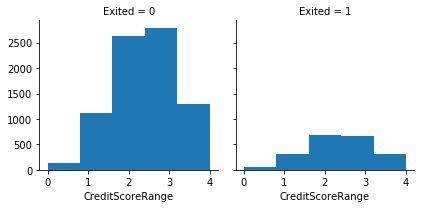

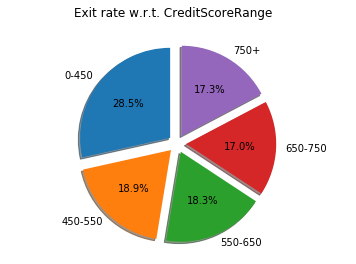

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.FacetGrid(visual_ds, col = "Exited")
g.map(plt.hist, "CreditScoreRange", bins = 5)

means = visual_ds[["CreditScoreRange", "Exited"]].groupby(["CreditScoreRange"], as_index = False).mean()

labels = "0-450", "450-550", "550-650", "650-750", "750+"
total = means["Exited"].sum()
sizes = [means["Exited"][0] / total, means["Exited"][1] / total \
        , means["Exited"][2] / total, means["Exited"][3] / total, means["Exited"][4] / total]

explode = (0.1, 0.1, 0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle("Exit rate w.r.t. CreditScoreRange")

plt.show()

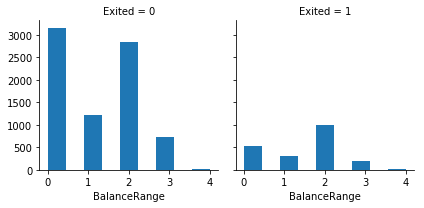

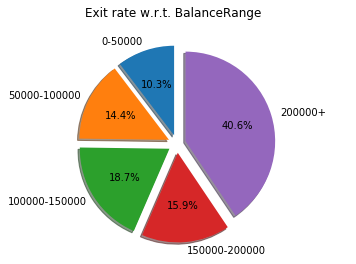

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.FacetGrid(visual_ds, col = "Exited")
g.map(plt.hist, "BalanceRange", bins = 9)

means = visual_ds[["BalanceRange", "Exited"]].groupby(["BalanceRange"], as_index = False).mean()

labels = "0-50000", "50000-100000", "100000-150000", "150000-200000", "200000+"
total = means["Exited"].sum()
sizes = [means["Exited"][0] / total, means["Exited"][1] / total \
        , means["Exited"][2] / total, means["Exited"][3] / total, means["Exited"][4] / total]

explode = (0.1, 0.1, 0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, startangle = 90)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle("Exit rate w.r.t. BalanceRange")

plt.show()

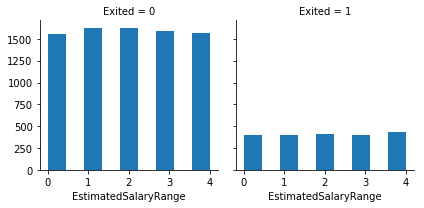

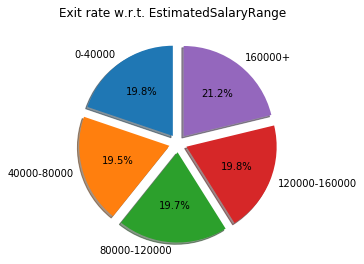

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.FacetGrid(visual_ds, col = "Exited")
g.map(plt.hist, "EstimatedSalaryRange", bins = 9)

means = visual_ds[["EstimatedSalaryRange", "Exited"]].groupby(["EstimatedSalaryRange"], as_index = False).mean()

labels = "0-40000", "40000-80000", "80000-120000", "120000-160000", "160000+"
total = means["Exited"].sum()
sizes = [means["Exited"][0] / total, means["Exited"][1] / total \
        , means["Exited"][2] / total, means["Exited"][3] / total, means["Exited"][4] / total]

explode = (0.1, 0.1, 0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, startangle = 90)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle("Exit rate w.r.t. EstimatedSalaryRange")

plt.show()

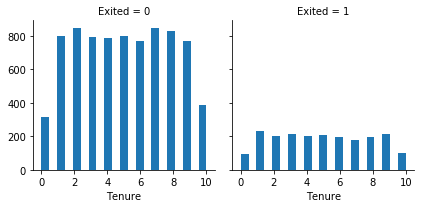

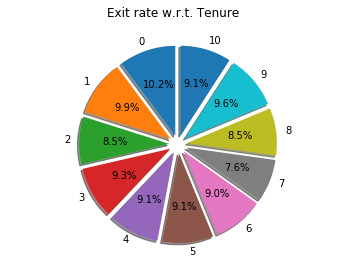

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.FacetGrid(visual_ds, col = "Exited")
g.map(plt.hist, "Tenure", bins = 21)

means = visual_ds[["Tenure", "Exited"]].groupby(["Tenure"], as_index = False).mean()

labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
total = means["Exited"].sum()
sizes = [means["Exited"][0] / total, means["Exited"][1] / total, \
         means["Exited"][2] / total, means["Exited"][3] / total, \
         means["Exited"][4] / total, means["Exited"][5] / total, \
         means["Exited"][6] / total, means["Exited"][7] / total, \
         means["Exited"][8] / total, means["Exited"][9] / total, \
        means["Exited"][10] / total]

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, startangle = 90)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle("Exit rate w.r.t. Tenure")

plt.show()

Tranformation of dataset itself

In [12]:
# transform gender values geographic values
if dataset["Gender"][0] in ("Male", "Female"):
    for row in [dataset]:
        row["Gender"] = row["Gender"].map( {"Male": 0, "Female": 1} ).astype(int)
        row["Geography"] = row["Geography"].map( {"France": 0, "Germany": 1, "Spain": 2} ).astype(int)
    # end of for loop
# end of if clause

# transform age values
if dataset["Age"][0] > 17:
    max_age = dataset["Age"].max()
    # mapping
    dataset["Age"] = dataset["Age"] * (4 / max_age)
# end of if clause

# transform CreditScore values
if dataset["CreditScore"][0] > 4:
    max_creditScore = dataset["CreditScore"].max()
    # mapping
    dataset["CreditScore"] = dataset["CreditScore"] * (4 / max_creditScore)
# end of if clause

# transform CreditScore values
if dataset["Balance"][1] > 4:
    max_balance = dataset["Balance"].max()
    # mapping
    dataset["Balance"] = dataset["Balance"] * (4 / max_balance)
# end of if clause

# transform EstimatedSalary values
if dataset["EstimatedSalary"][0] > 4:
    max_estimatedSalary = dataset["EstimatedSalary"].max()
    # mapping
    dataset["EstimatedSalary"] = dataset["EstimatedSalary"] * (4 / max_estimatedSalary)
# end of if clause

# transform Tenure values
if dataset["Tenure"][0] > 0:
    max_tenure = dataset["Tenure"].max()
    # mapping
    dataset["Tenure"] = dataset["Tenure"] * (4 / max_tenure)
# end of if clause

if "RowNumber" in dataset.columns:
    dataset = dataset.drop(["RowNumber"], axis=1)
if "CustomerId" in dataset.columns:
    dataset = dataset.drop(["CustomerId"], axis=1)
if "Surname" in dataset.columns:
    dataset = dataset.drop(["Surname"], axis=1)

dataset.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,3.061312,0.746300,0.454300,1.692252,2.00512,1.219394,1.530200,0.70550,0.515100,2.001880,0.203700
std,0.454839,0.827529,0.497932,0.455992,1.15687,0.994785,0.581654,0.45584,0.499797,1.150253,0.402769
min,1.647059,0.000000,0.000000,0.782609,0.00000,0.000000,1.000000,0.00000,0.000000,0.000232,0.000000
25%,2.748235,0.000000,0.000000,1.391304,1.20000,0.000000,1.000000,0.00000,0.000000,1.020081,0.000000
50%,3.068235,0.000000,0.000000,1.608696,2.00000,1.549610,1.000000,1.00000,1.000000,2.003954,0.000000
75%,3.378824,1.000000,1.000000,1.913043,2.80000,2.034997,2.000000,1.00000,1.000000,2.987877,0.000000
max,4.000000,2.000000,1.000000,4.000000,4.00000,4.000000,4.000000,1.00000,1.000000,4.000000,1.000000


Extracting train dataset from dataset.

In [13]:
test_indis = 10

train_dataset = dataset[dataset.index % test_indis != 0]
train_dataset.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,3.059530,0.747222,0.453222,1.694652,2.001333,1.217620,1.526778,0.705444,0.514778,1.999691,0.205556
std,0.454562,0.829365,0.497835,0.456617,1.156841,0.994379,0.578492,0.455868,0.499809,1.151912,0.404129
min,1.647059,0.000000,0.000000,0.782609,0.000000,0.000000,1.000000,0.000000,0.000000,0.000232,0.000000
25%,2.743529,0.000000,0.000000,1.391304,0.800000,0.000000,1.000000,0.000000,0.000000,1.015405,0.000000
50%,3.063529,0.000000,0.000000,1.608696,2.000000,1.546432,1.000000,1.000000,1.000000,2.005519,0.000000
75%,3.374118,1.000000,1.000000,1.913043,2.800000,2.033889,2.000000,1.000000,1.000000,2.988440,0.000000
max,4.000000,2.000000,1.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,4.000000,1.000000


Extracting test dataset from dataset

In [14]:
test_dataset = dataset[dataset.index % test_indis == 0]
test_dataset.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000
mean,3.077346,0.738000,0.464000,1.670652,2.039200,1.235357,1.56100,0.70600,0.518000,2.021578,0.187000
std,0.457244,0.811181,0.498952,0.449973,1.157153,0.998784,0.60881,0.45582,0.499926,1.135591,0.390107
min,1.797647,0.000000,0.000000,0.782609,0.000000,0.000000,1.00000,0.00000,0.000000,0.001835,0.000000
25%,2.767059,0.000000,0.000000,1.347826,1.200000,0.000000,1.00000,0.00000,0.000000,1.069400,0.000000
50%,3.082353,1.000000,0.000000,1.608696,2.000000,1.568921,2.00000,1.00000,1.000000,1.999009,0.000000
75%,3.389412,1.000000,1.000000,1.869565,3.200000,2.052969,2.00000,1.00000,1.000000,2.972700,0.000000
max,4.000000,2.000000,1.000000,3.521739,4.000000,3.800548,4.00000,1.00000,1.000000,3.999565,1.000000


## Logistic regression
We are going to realize 3 different approaches for logistic regression
### Scikit Learn Practice

In [15]:
from sklearn.linear_model import LogisticRegression

X_train = train_dataset.drop(["Exited"], axis=1)
Y_train = train_dataset.Exited
X_test  = test_dataset.drop(["Exited"], axis=1).copy()
Y_test  = test_dataset.Exited

# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
#print(Y_pred)
acc_log = round(logreg.score(X_test, Y_test), 3)
print("accuracy:", acc_log)

accuracy: 0.821


### Pytorch Practice

In [16]:
# improt pytorch libraries
import numpy as np
import torch as py
from torch.autograd import Variable

columns = train_dataset.columns.drop("Exited")

# determine learning rate
eta = 0.00002

# create a linear model. y = w*x + b
model = py.nn.Linear(10, 1)

# define an optimizer. I have defined Stochastic Gradient Descent.
optim = py.optim.SGD(model.parameters(), lr=eta)

# define loss function. It is Binary Cross Entropy as a loss function.
loss = py.nn.BCELoss(size_average=True)

# definition of sigmoid funtion to normalize calculation to between 0 and 1 for BCELoss.
sigmoid = py.nn.Sigmoid()

def gradient(X, y, epoch):
    # gradient steps
    for i in range(epoch):
        # compute loss value.
        dE = loss(sigmoid(model(Variable(X))) , Variable(y))
        # reset of gradient buffer
        optim.zero_grad()
        # compute gradients with respect to vectors of X by using auto differitiation.
        dE.backward()
        # update optimizer.
        optim.step()
# end of def gradient

def train():
    # get train visual_ds
    X = py.from_numpy(np.array(train_dataset[columns])).float()
    # get classes from train visual_ds
    y = py.from_numpy(np.array([[1] if v == 1 else [0] for v in np.array(train_dataset[["Exited"]])])).float()
    # train them.
    gradient(X, y, 100)
# end of def train

def test():
    # get test_visual_ds
    X = py.from_numpy(np.array(test_dataset[columns])).float()
    # get classes from test visual_ds.
    y = [1 if v == 1 else 0 for v in np.array(test_dataset[["Exited"]])]
    #print("y:",y)
    # classify them
    Z = sigmoid(model(Variable(X)))
    # get classification results.
    Z_dist = np.array([1 if (v.data >= 0.5).numpy() else 0 for v in Z])
    #print("s:", Z_dist)
    
    # compute accuracy.
    correct = (y == Z_dist).sum()
    
    print("accuracy:", correct / len(y))
# end of def test

train()
test()

accuracy: 0.804


### Custom Logistic Regression Algorithm Practice

In [17]:
# import libraries
import pandas as pd
import numpy as np
import math
import numpy as np

def sigmoid(t):
    return np.exp(t)/(1+np.exp(t))
# end of def sigmoid

def gradientAscentStep(eta, X, y, w):
    dL = np.dot(X.T, y - sigmoid(np.dot(X, w)))
    w = w + eta * dL
    return w
# end of def gradientAscentStep

def gradientAscent(eta, X, y, w, epoch):
    for i in range(epoch):
        w = gradientAscentStep(eta, X, y, w)
        #print("w:",w)
    return w
# end of def gradientAscent

# total count of sample space
total = float(len(train_dataset))

columns = train_dataset.columns.drop("Exited")

def train(eta, w):
    X = np.array(train_dataset[columns])
    y = np.array([1 if v == 1 else 0 for v in np.array(train_dataset[["Exited"]])])
    w = gradientAscent(eta, X, y, w, 1000)
    return w
# end of def train

def test(w):
    X = np.array(test_dataset[columns])
    y = np.array([1 if v == 1 else 0 for v in np.array(test_dataset[["Exited"]])])
    #print("y:\n",y)
    Z = np.dot(X, w)
    #print("Z:", sigmoid(Z))
    Z_dist = [1 if v >= 0.5 else 0 for v in sigmoid(Z)]
    #print("s:\n", np.array(Z_dist))
    
    # compute accuracy
    correct = (y == Z_dist).sum()
    
    print("accuracy:", correct / len(y))
# end of def test

# intial values
w = np.array(train_dataset.drop("Exited", axis=1).mean())
#w = np.array(np.zeros(len(columns)))
eta = 0.000009
#eta = 0.00009

w = train(eta, w)
#print("w:", w)
test(w)

accuracy: 0.824


## Gradient Descent Boosting
### Scikit Learn Practice

In [18]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

X_train = train_dataset.drop(["Exited"], axis=1)
Y_train = train_dataset.Exited
X_test  = test_dataset.drop(["Exited"], axis=1).copy()
Y_test  = test_dataset.Exited

gbc = GradientBoostingClassifier(n_estimators = 20, learning_rate = 1.0, max_depth = 10, random_state = 0)
gbc.fit(X_train, Y_train)
Y_pred = gbc.predict(X_test)
print("accuracy:", gbc.score(X_test, Y_test))

accuracy: 0.825


In [21]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

X_train = train_dataset.drop(["Exited"], axis = 1)
Y_train = train_dataset.Exited
X_test  = test_dataset.drop(["Exited"], axis = 1).copy()
Y_test  = test_dataset.Exited

gbc = GradientBoostingRegressor(n_estimators = 20, learning_rate = 1.0, max_depth = 10, random_state = 0, loss = "ls")
gbc.fit(X_train, Y_train)
Y_pred = gbc.predict(X_test)
print("accuracy:", gbc.score(X_test, Y_test))

accuracy: -0.419150271777
